In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_n = X_train/X_train.max()
X_test_n = X_test/X_test.max()
# reshape for color channels
X_train_n = X_train_n.reshape(-1, 28, 28, 1)
X_test_n = X_test_n.reshape(-1, 28, 28, 1)

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train_n.shape[1:], activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=X_train_n.shape[1:], activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["acc", "sparse_categorical_accuracy"])

In [7]:
history = model.fit(X_train_n, y_train, validation_data=(X_test_n, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4852 - acc: 0.8262 - sparse_categorical_accuracy: 0.8262 - val_loss: 0.4092 - val_acc: 0.8496 - val_sparse_categorical_accuracy: 0.8496
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3310 - acc: 0.8805 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3334 - val_acc: 0.8813 - val_sparse_categorical_accuracy: 0.8813
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2866 - acc: 0.8953 - sparse_categorical_accuracy: 0.8953 - val_loss: 0.3045 - val_acc: 0.8893 - val_sparse_categorical_accuracy: 0.8893
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2573 - acc: 0.9050 - sparse_categorical_accuracy: 0.9050 - val_loss: 0.2825 - val_acc: 0.8950 - val_sparse_categorical_accuracy: 0.8950
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2357 - acc: 0.9120 - sparse_categorical_accuracy: 0.9120

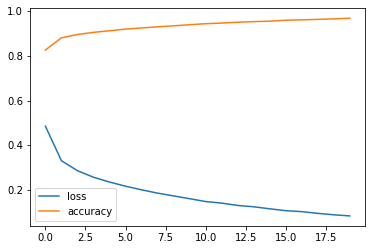

In [9]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["acc"], label="accuracy")
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [11]:
model.save("fashion_conv_nn")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_conv_nn\assets
